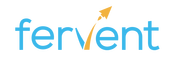
# Expected Returns using the Average (Mean) Method
In this walkthrough, you'll learn how to calculate the expected return of a stock using the mean method on Python.

You'll be working with Facebook stock data, stored in a csv file called `fb_price.csv`

In our case, the file is stored in a folder called `data`, which in turn is stored in a master folder called `iapm_python`.

The expected return using the mean method is calculated as...
$$E[r_j] = \frac{1}{n}\sum_{i=1}^nr_j$$

Where:  
$E[r_j] = $ Expected return on a stock $j$  
$r_j = $ Return on a stock $j$ 

In [1]:
# Import package dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<div class="alert alert-block alert-info">
<b>Confused by the code below?</b>  

Go back to the previous lecture on Calculating Stock Returns to understand the code in `In[2]` before moving on any further.
</div>


In [2]:
df = pd.read_csv("../data/fb_price.csv")  # Read in fb price data as a pandas dataframe
df = df[['Date', 'Adj Close']]  # Extract relevant columns

df.rename(columns={'Date' : 'date', 'Adj Close' : 'price_t'},
          inplace=True)  # Rename columns to better match PEP8 standards

df['returns'] = df['price_t'].pct_change(1)  # Calculate returns

In [3]:
df.head()

,date,price_t,returns
0,2012-05-18,38.230000,NaN
1,2012-05-21,34.029999,-0.109861
2,2012-05-22,31.000000,-0.089039
3,2012-05-23,32.000000,0.032258
4,2012-05-24,33.029999,0.032187


In [4]:
# Calculate the mean based Expected Return
expected_return_fb = df['returns'].mean()

In [5]:
expected_return_fb

0.0013494618587500079

In [6]:
expected_return_fb * 100

0.1349461858750008

In [7]:
# Comparing the number of observations here (1,413)
# to the manual estimation (with 5 observations)
len(df['returns'].dropna())

1413

In [8]:
# Create a new column for the Expected Return on Facebook
df['expected_return_fb'] = expected_return_fb

In [9]:
df.head()

,date,price_t,returns,expected_return_fb
0,2012-05-18,38.230000,NaN,0.001349
1,2012-05-21,34.029999,-0.109861,0.001349
2,2012-05-22,31.000000,-0.089039,0.001349
3,2012-05-23,32.000000,0.032258,0.001349
4,2012-05-24,33.029999,0.032187,0.001349


In [10]:
# Set the date column as the index to ensure we have dates in the plot.
df.set_index('date', inplace=True)

<div class="alert alert-block alert-info">
<b>Single vs. Double Square Brackets</b>  

Note that when we want to select <i>multiple</i> columns from a dataframe, we use <i>two</i> square brackets instead of one.
</div>


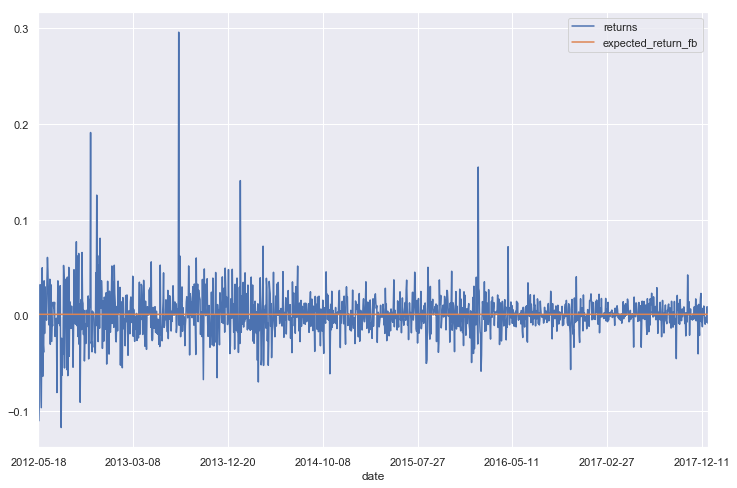

In [11]:
# Plot the Returns and Expected Return of Facebook
df[['returns', 'expected_return_fb']].plot(figsize=(12, 8))

In [12]:
df.head()

,price_t,returns,expected_return_fb
date,,,
2012-05-18,38.230000,NaN,0.001349
2012-05-21,34.029999,-0.109861,0.001349
2012-05-22,31.000000,-0.089039,0.001349
2012-05-23,32.000000,0.032258,0.001349
2012-05-24,33.029999,0.032187,0.001349


## Exploring Moving Averages

<div class="alert alert-block alert-info">
<b>What is `rolling()`?</b>  

The "rolling()" method 'rolls' over N rows. In our case, N = 30 since we want to 'roll' over 30 periods.

Full documentation is viewable here:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html
</div>


In [13]:
# Estimate a 30 Day Moving Average ("MA") Expected Return
df['expected_return_ma_30d'] = df['returns'].rolling(30).mean()

In [14]:
# Note that the first 29 observations for expected_return_ma_30d will be NaN
# This is because we're estimating a 30 Day Rolling Mean.
# Naturally, the first 29 won't have any mean!
df.head()

,price_t,returns,expected_return_fb,expected_return_ma_30d
date,,,,
2012-05-18,38.230000,NaN,0.001349,NaN
2012-05-21,34.029999,-0.109861,0.001349,NaN
2012-05-22,31.000000,-0.089039,0.001349,NaN
2012-05-23,32.000000,0.032258,0.001349,NaN
2012-05-24,33.029999,0.032187,0.001349,NaN


<div class="alert alert-block alert-info">
<b>What is `df.iloc[]`?</b>  

iloc stands for "index location". It helps us slice parts of the dataframe based on the index location.  
<br>
In this case, we know that the <i>first</i> instance of a non NaN value for `expected_return_ma_30d` must start at index 30 (i.e., the 30th observation).  
<br>
Thus it makes sense for us to explore values from index 30 onwards.  
<br>
`df.iloc[30:35]` gets values for the 5 rows from index 30 through to 34 [30, 31, 32, 33, 34]  

Full documentation is viewable here:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
</div>


In [15]:
# Explore values for the 30 Day Moving average:
df.iloc[30:35]

,price_t,returns,expected_return_fb,expected_return_ma_30d
date,,,,
2012-07-02,30.770000,-0.010611,0.001349,-0.006248
2012-07-03,31.200001,0.013975,0.001349,-0.002120
2012-07-05,31.469999,0.008654,0.001349,0.001137
2012-07-06,31.730000,0.008262,0.001349,0.000337
2012-07-09,32.169998,0.013867,0.001349,-0.000274


In [16]:
# Estimate a 7 Day Moving Average ("MA") Expected Return
df['expected_return_ma_7d'] = df['returns'].rolling(7).mean()

# Note that the first 6 observations for expected_return_ma_30d will be NaN
# This is because we're estimating a 7 Day Rolling Mean.
# Naturally, the first 6 won't have any mean!

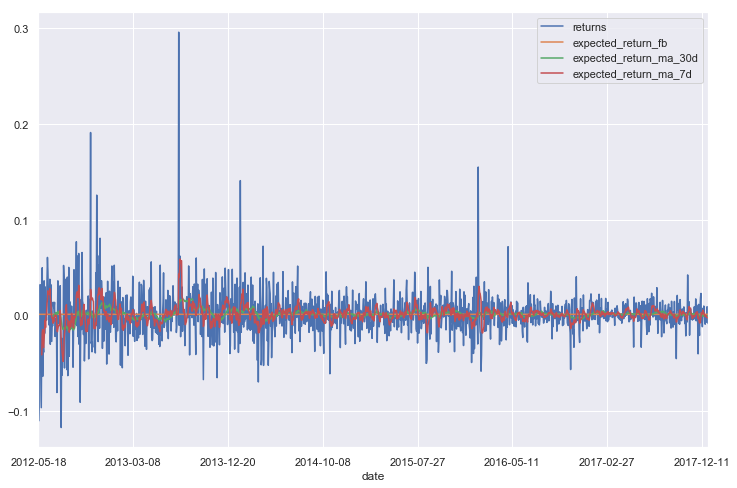

In [17]:
# Plot all the time series
df[['returns', 'expected_return_fb',
    'expected_return_ma_30d', 'expected_return_ma_7d']].plot(figsize=(12, 8))

## BONUS: Better Plotting
The default colours don't look too great. We can improve our charts by customising the colours and adding suitable titles using the code below.  

Parameters inside the `color` tuple are HEX colour codes. Search "hex color picker" to see different colours and their respective HEX codes!

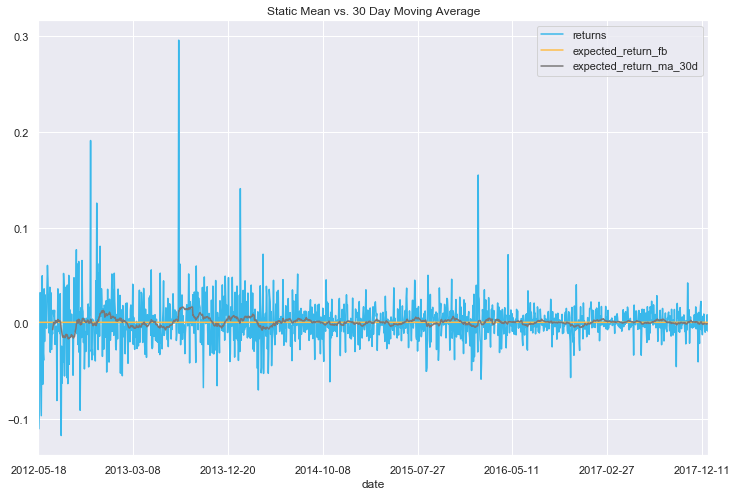

In [18]:
df[['returns', 'expected_return_fb', 'expected_return_ma_30d']].plot(
    figsize=(12, 8), color=('#39b8eb', '#ffbd4a', '#7a7878'),
    title='Static Mean vs. 30 Day Moving Average')

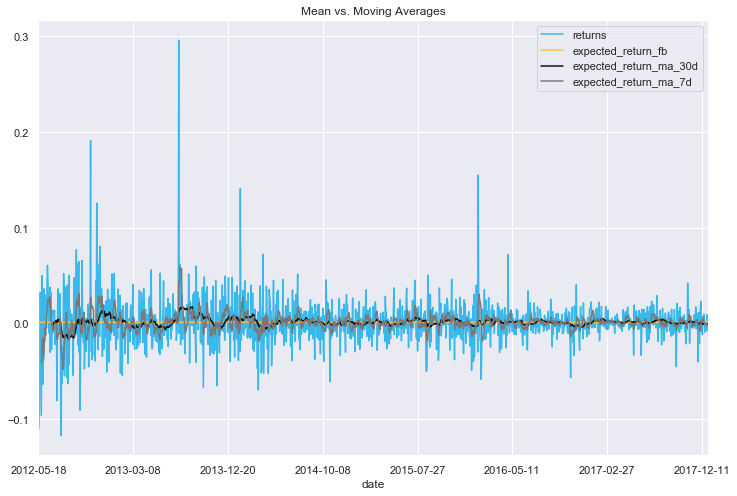

In [19]:
df[['returns', 'expected_return_fb', 'expected_return_ma_30d', 'expected_return_ma_7d']].plot(
    figsize=(12, 8), color=('#39b8eb', '#ffbd4a', '#121111', '#7a7878'),
    title='Mean vs. Moving Averages')